In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

from bore.benchmarks.racing.cars import F110
from bore.benchmarks.racing.tracks import UCB

from bore.benchmarks.racing.line import randomTrajectory, calcMinimumTime

In [7]:
N_WAYPOINTS = 100           # resampled waypoints
SCALE = 0.95                # shrinking factor for track width
LASTIDX = 0                 # fixed node at the end DO NOT CHANGE

# define indices for the nodes
NODES = [10, 32, 44, 67, 83, 100, 113, 127, 144, 160, 175, 191]

#####################################################################
# track specific data

params = F110()
track = UCB()

track_width = track.track_width*SCALE
theta = track.theta_track[NODES]
N_DIMS = len(NODES)
n_waypoints = N_DIMS

rand_traj = randomTrajectory(track=track, n_waypoints=n_waypoints)

In [8]:
nodes = rand_traj.sample_nodes(scale=SCALE)

wx, wy = rand_traj.calculate_xy(
    width=nodes,
    last_index=NODES[LASTIDX],
    theta=theta)
x, y = rand_traj.fit_cubic_splines(wx=wx, wy=wy, n_samples=N_WAYPOINTS)

lap_time = calcMinimumTime(x, y, **params)

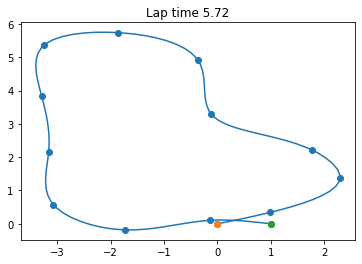

In [9]:
fig, ax = plt.subplots()

ax.set_title(f"Lap time {lap_time:.2f}")

ax.scatter(wx, wy)
ax.plot(x, y)

plt.plot(wx[0], wy[0], 'o', label='start')
plt.plot(wx[-1], wy[-1], 'o', label='finish')

plt.show()

In [10]:
lap_time

5.720723966496629